This notebook produces figures for the sourmashconsumr pub (excluding new methods validation figures, which can be found in different notebooks).

# Notebook setup

In [1]:
remotes::install_github("Arcadia-Science/sourmashconsumr", force = T)

evaluate (0.19  -> 0.20 ) [CRAN]
curl     (4.3.3 -> 5.0.0) [CRAN]


Skipping 1 packages not available: phyloseq

Installing 2 packages: evaluate, curl

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/private/var/folders/76/q53ldgh1667_lm49fpxybglc0000gn/T/RtmpDqpFQe/remotes21ef10a7f930/Arcadia-Science-sourmashconsumr-a983a4d/DESCRIPTION’
─  preparing ‘sourmashconsumr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘sourmashconsumr_0.1.0.tar.gz’
   


In [2]:
library(sourmashconsumr)
library(dplyr)
library(ggplot2)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)

In [4]:
# up one directory out of notebooks for execution directory
setwd("..")

In [5]:
# use Arcadia brand font if present
if(file.exists("inputs/SuisseIntl-Regular.otf")){
  library(showtext)
  font_add("SuisseIntl-Regular", "inputs/SuisseIntl-Regular.otf")
  showtext::showtext_auto()
  theme_arcadia <- theme_classic() +
    theme(text = element_text(family = "SuisseIntl-Regular"))
} else {
  theme_arcadia <- theme_classic()
}

Loading required package: sysfonts

Loading required package: showtextdb



In [6]:
# load example data sets that are built into the package
data(gut_compare_df)
data(gut_signatures_df)
data(gut_gather_df)
data(gut_taxonomy_annotate_df)

In [7]:
# create a metadata data frame 
run_accessions <- c("SRR5936131", "SRR5947006", "SRR5935765",
                    "SRR5936197", "SRR5946923", "SRR5946920")
groups <- c("cd", "cd", "cd", "nonibd", "nonibd", "nonibd")
metadata <- data.frame(run_accessions = run_accessions, groups = groups) 

# Figures

## Signature: upset plot

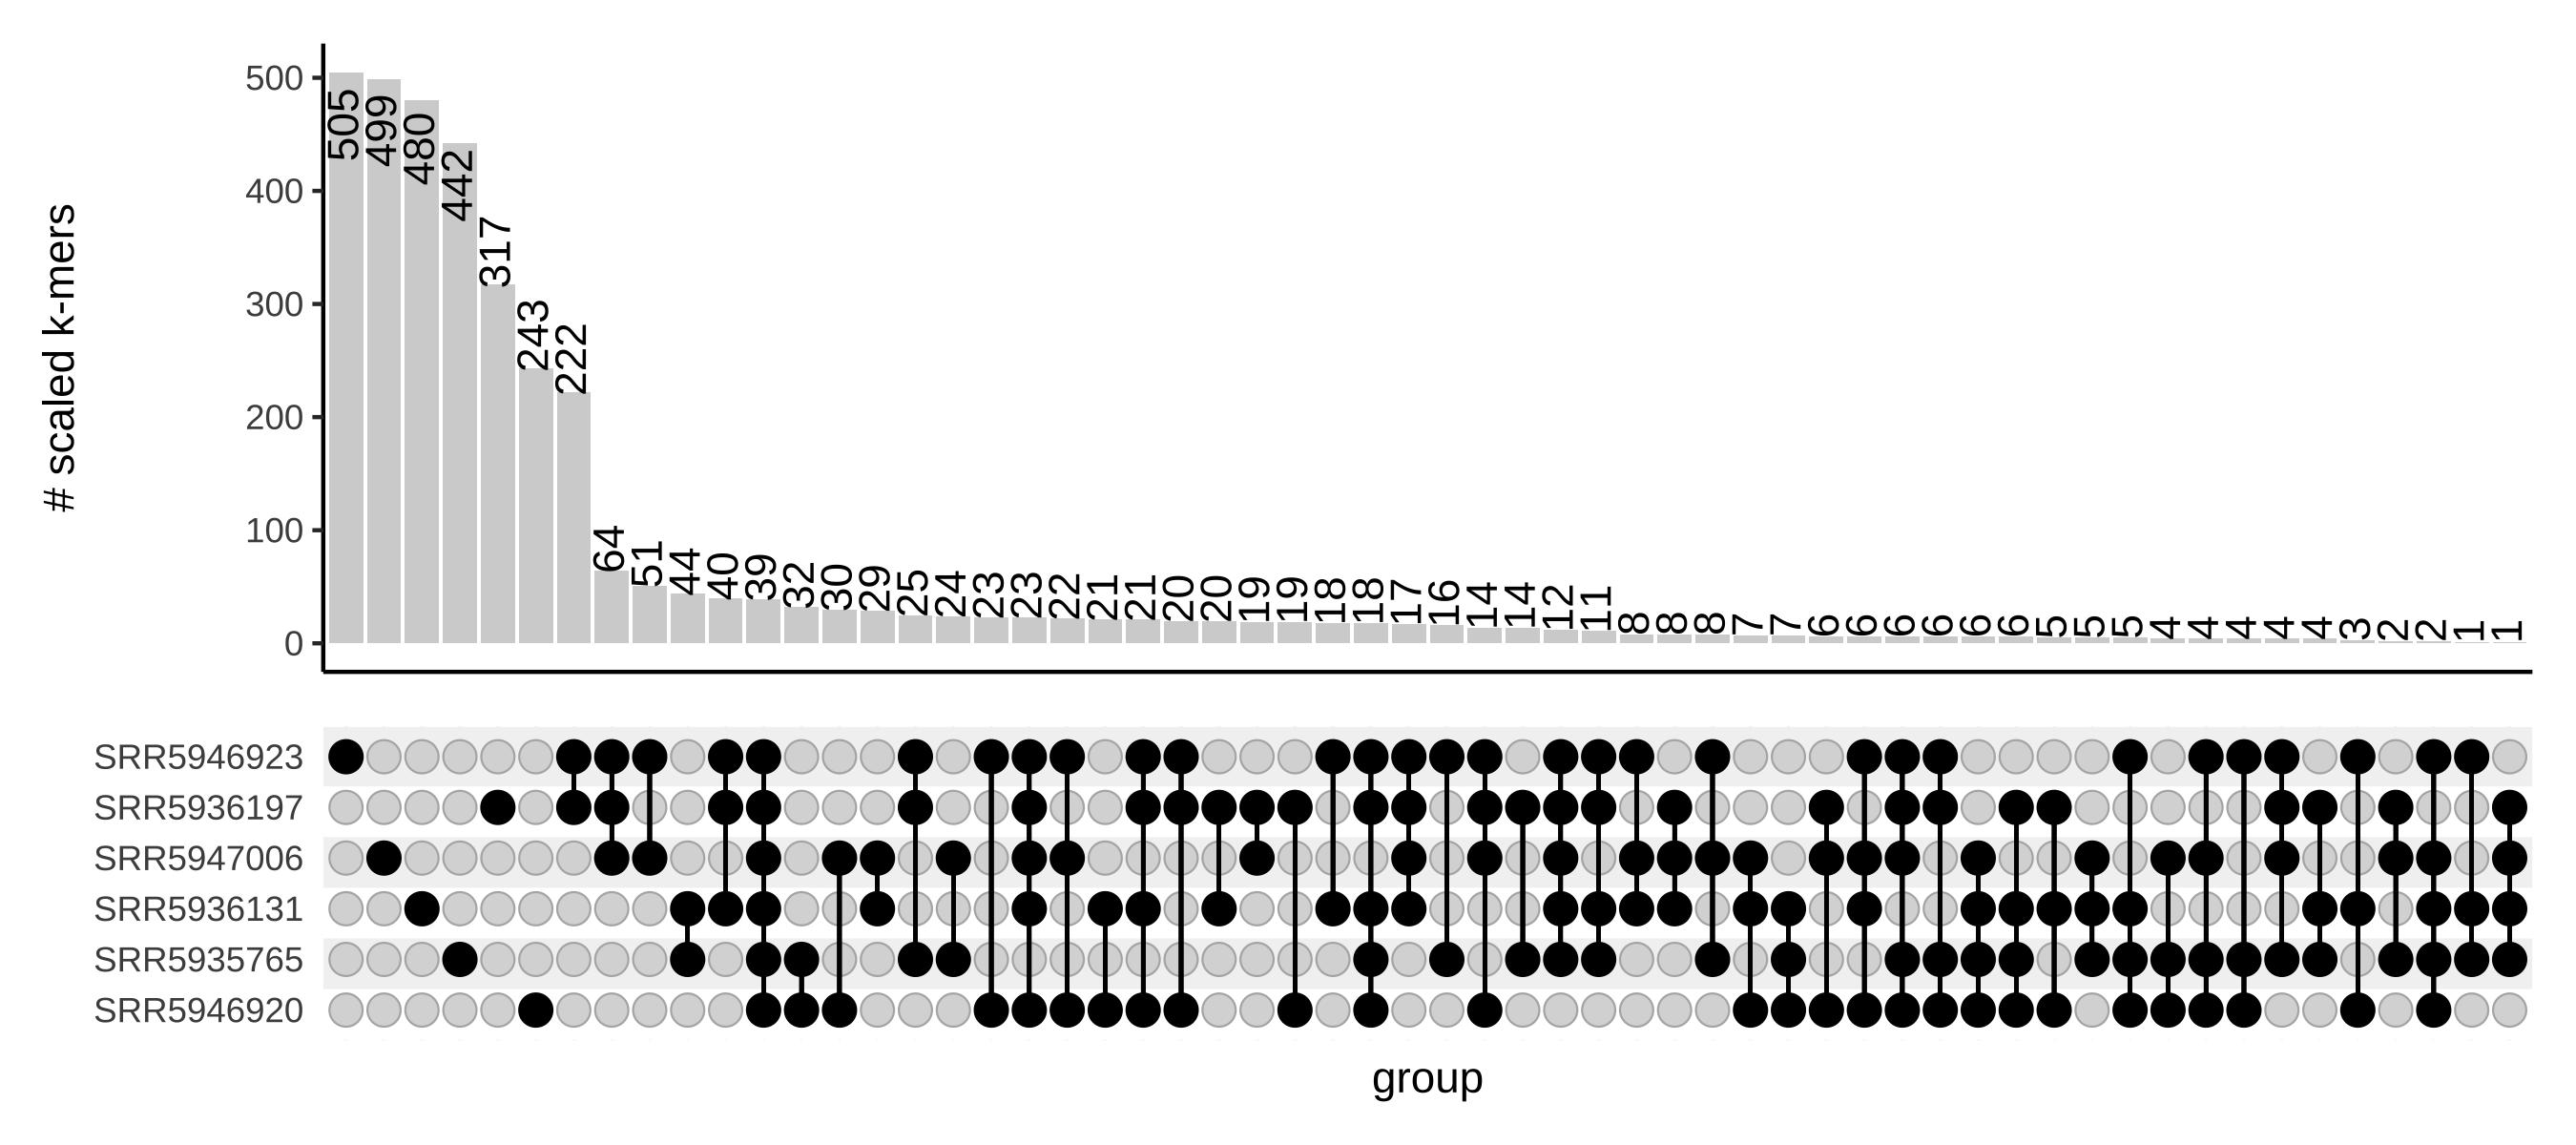

In [8]:
gut_signatures_df <- gut_signatures_df %>%
  dplyr::filter(ksize == 21)
gut_signatures_upset_df <- from_signatures_to_upset_df(signatures_df = gut_signatures_df)

# adjust plot size rendered inline
options(repr.plot.width = 9, repr.plot.height = 4, repr.plot.res = 300)
plot_signatures_upset(gut_signatures_upset_df)

## Signature: accumulation curve

In [13]:
data(gut_signatures_df)
head(gut_signatures_df)

class,email,hash_function,filename,name,license,num,ksize,seed,max_hash,scaled,mins,md5sum,abundances,molecule,version
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,64547638983,7a9ad88ba612b735cf92313f05bbaf35,10,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,112703715466,7a9ad88ba612b735cf92313f05bbaf35,1,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,248407864107,7a9ad88ba612b735cf92313f05bbaf35,2,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,282779425292,7a9ad88ba612b735cf92313f05bbaf35,2,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,368292370495,7a9ad88ba612b735cf92313f05bbaf35,4,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,500258584388,7a9ad88ba612b735cf92313f05bbaf35,8,dna,0.4


In [14]:
data(gut_signatures_df)
gut_signatures_df_k31 <- gut_signatures_df %>%
  dplyr::filter(ksize == 31)

In [15]:
rarefaction_df <- from_signatures_to_rarefaction_df(signatures_df = gut_signatures_df_k31)

In [16]:
# join the metadata data frame with the rarefaction_df
rarefaction_df <- rarefaction_df %>%
  dplyr::left_join(metadata, by = c("name" = "run_accessions"))

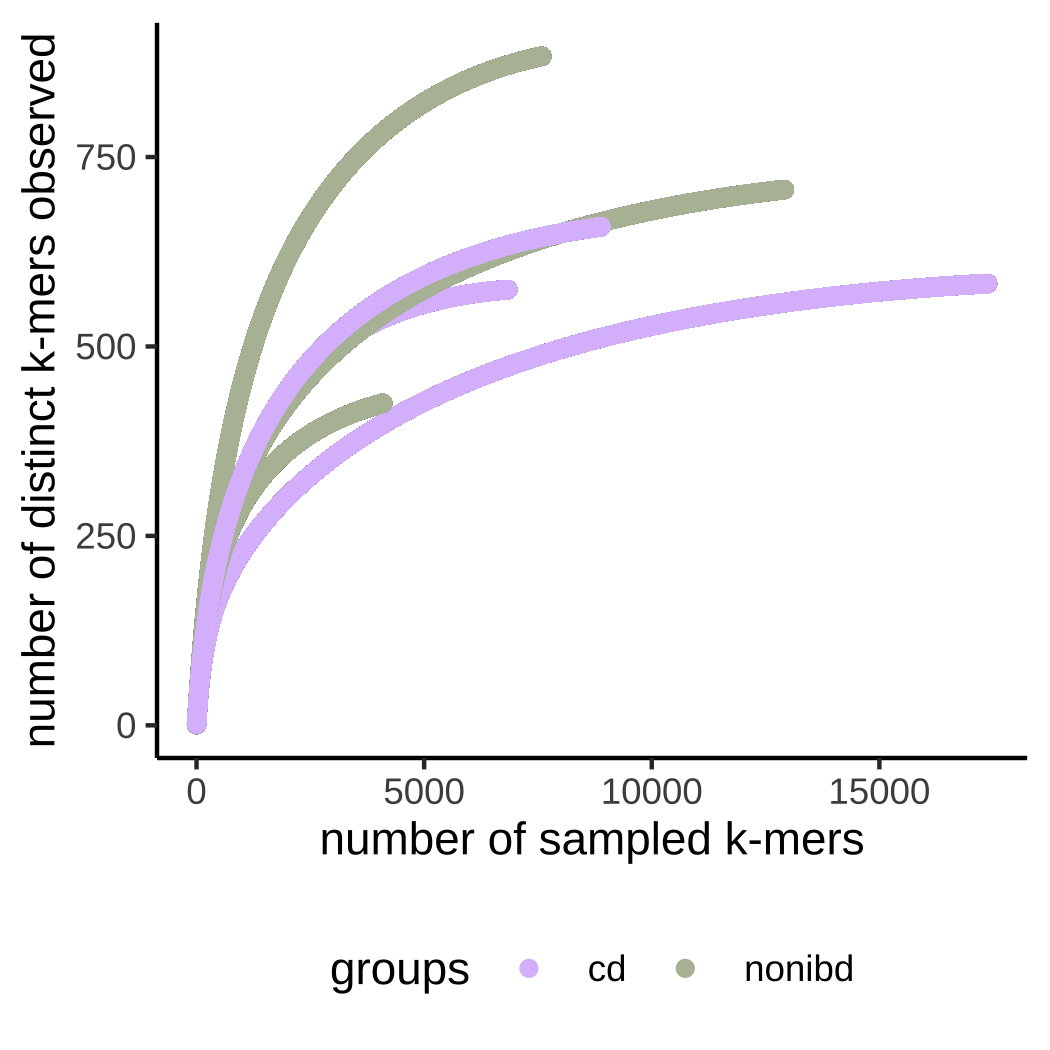

In [17]:
# adjust plot size rendered inline
options(repr.plot.width = 3.5, repr.plot.height = 3.5, repr.plot.res = 300)

# create and modify a plot
plot_signatures_rarefaction(rarefaction_df = rarefaction_df, fraction_of_points_to_plot = 1) +
  ggplot2::geom_point(ggplot2::aes(color = groups)) +
  scale_color_manual(values = c("#DCBFFC", "#B5BEA4")) +
  theme(legend.position = "bottom")

## Compare: MDS plot

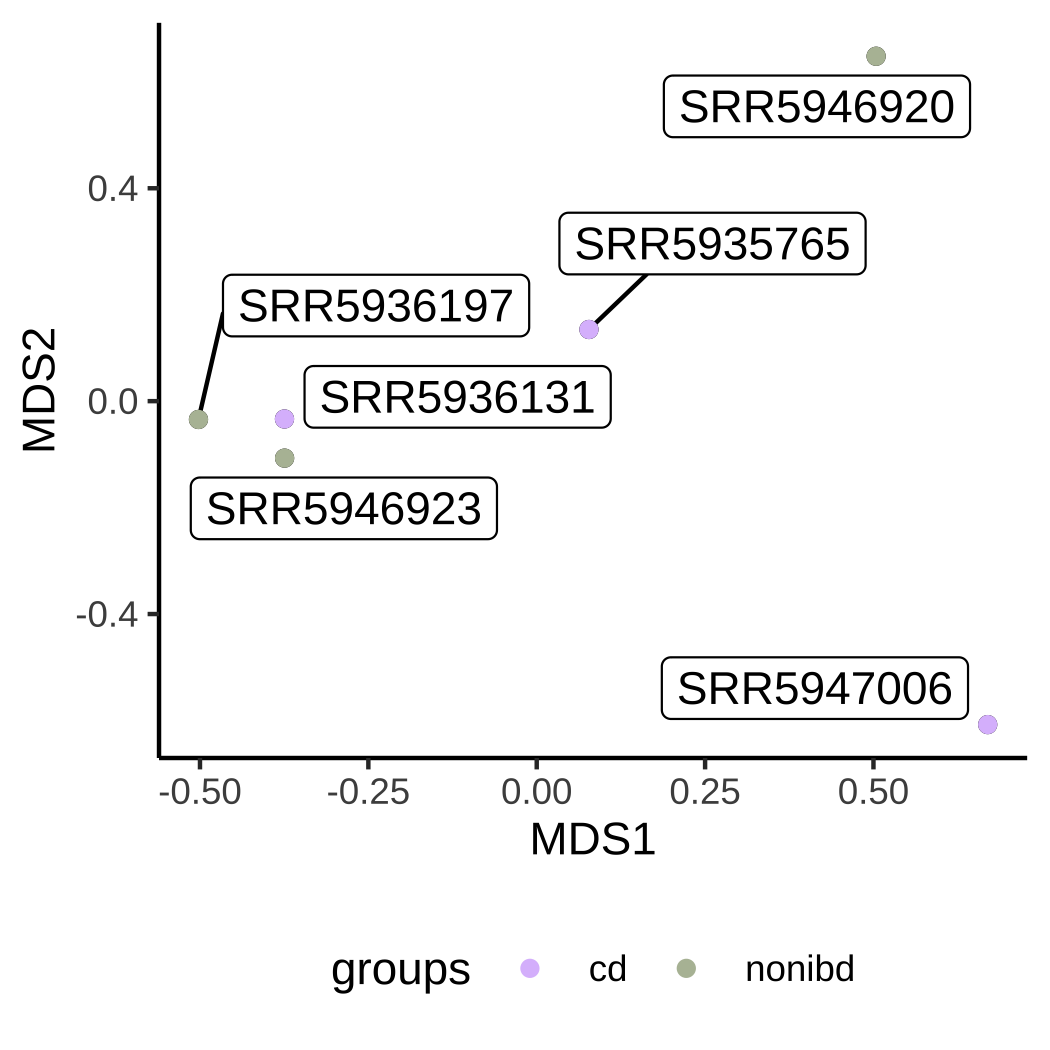

In [18]:
gut_compare_mds_df <- make_compare_mds(gut_compare_df) %>%
  left_join(metadata, by = c("sample" = "run_accessions"))

compare_plt <- plot_compare_mds(gut_compare_mds_df) +
  geom_point(ggplot2::aes(color = groups)) +
  scale_color_manual(values = c("#DCBFFC", "#B5BEA4")) +
  theme(legend.position = "bottom")

options(repr.plot.width = 3.5, repr.plot.height = 3.5, repr.plot.res = 300)
compare_plt

## Compare: heatmap

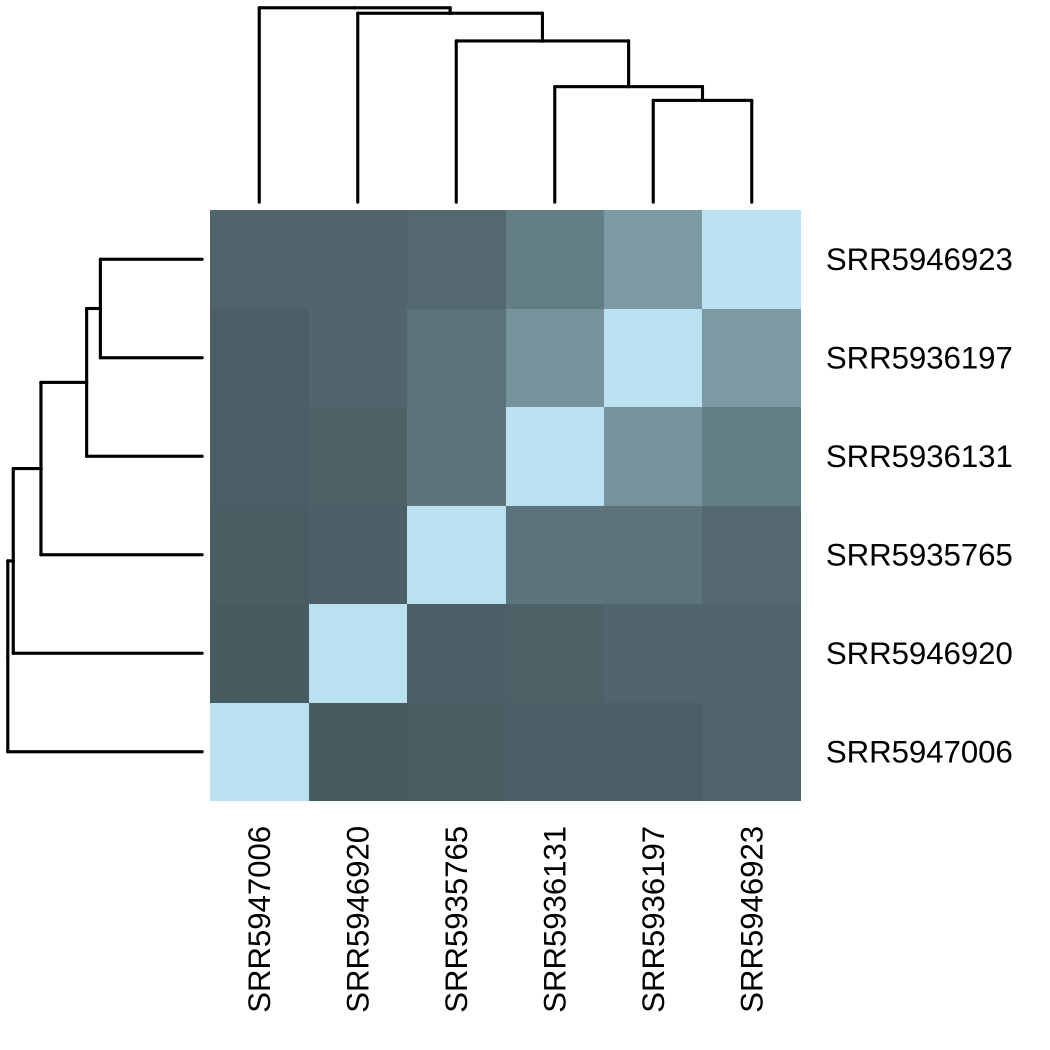

In [19]:
compare_heatmap <- plot_compare_heatmap(gut_compare_df, cexRow = 0.75, cexCol = 0.75,
                                        col = grDevices::colorRampPalette(c("#596F74", "#C6E7F4"))(n = 100))

## Gather: percent unclassified

In [20]:
gather_unclassified_plt <- plot_gather_classified(gather_df = gut_gather_df) +
  theme(legend.position = "bottom") +
  scale_fill_manual(values = c("#8A99AD", "#EBEDE8")) +
  guides(fill = guide_legend(nrow = 2, byrow = TRUE)) 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


## Gather: upset plot

In [21]:
gut_gather_upset_df <- from_gather_to_upset_df(gather_df = gut_gather_df)
gather_upset_plt <- plot_gather_upset(upset_df = gut_gather_upset_df)

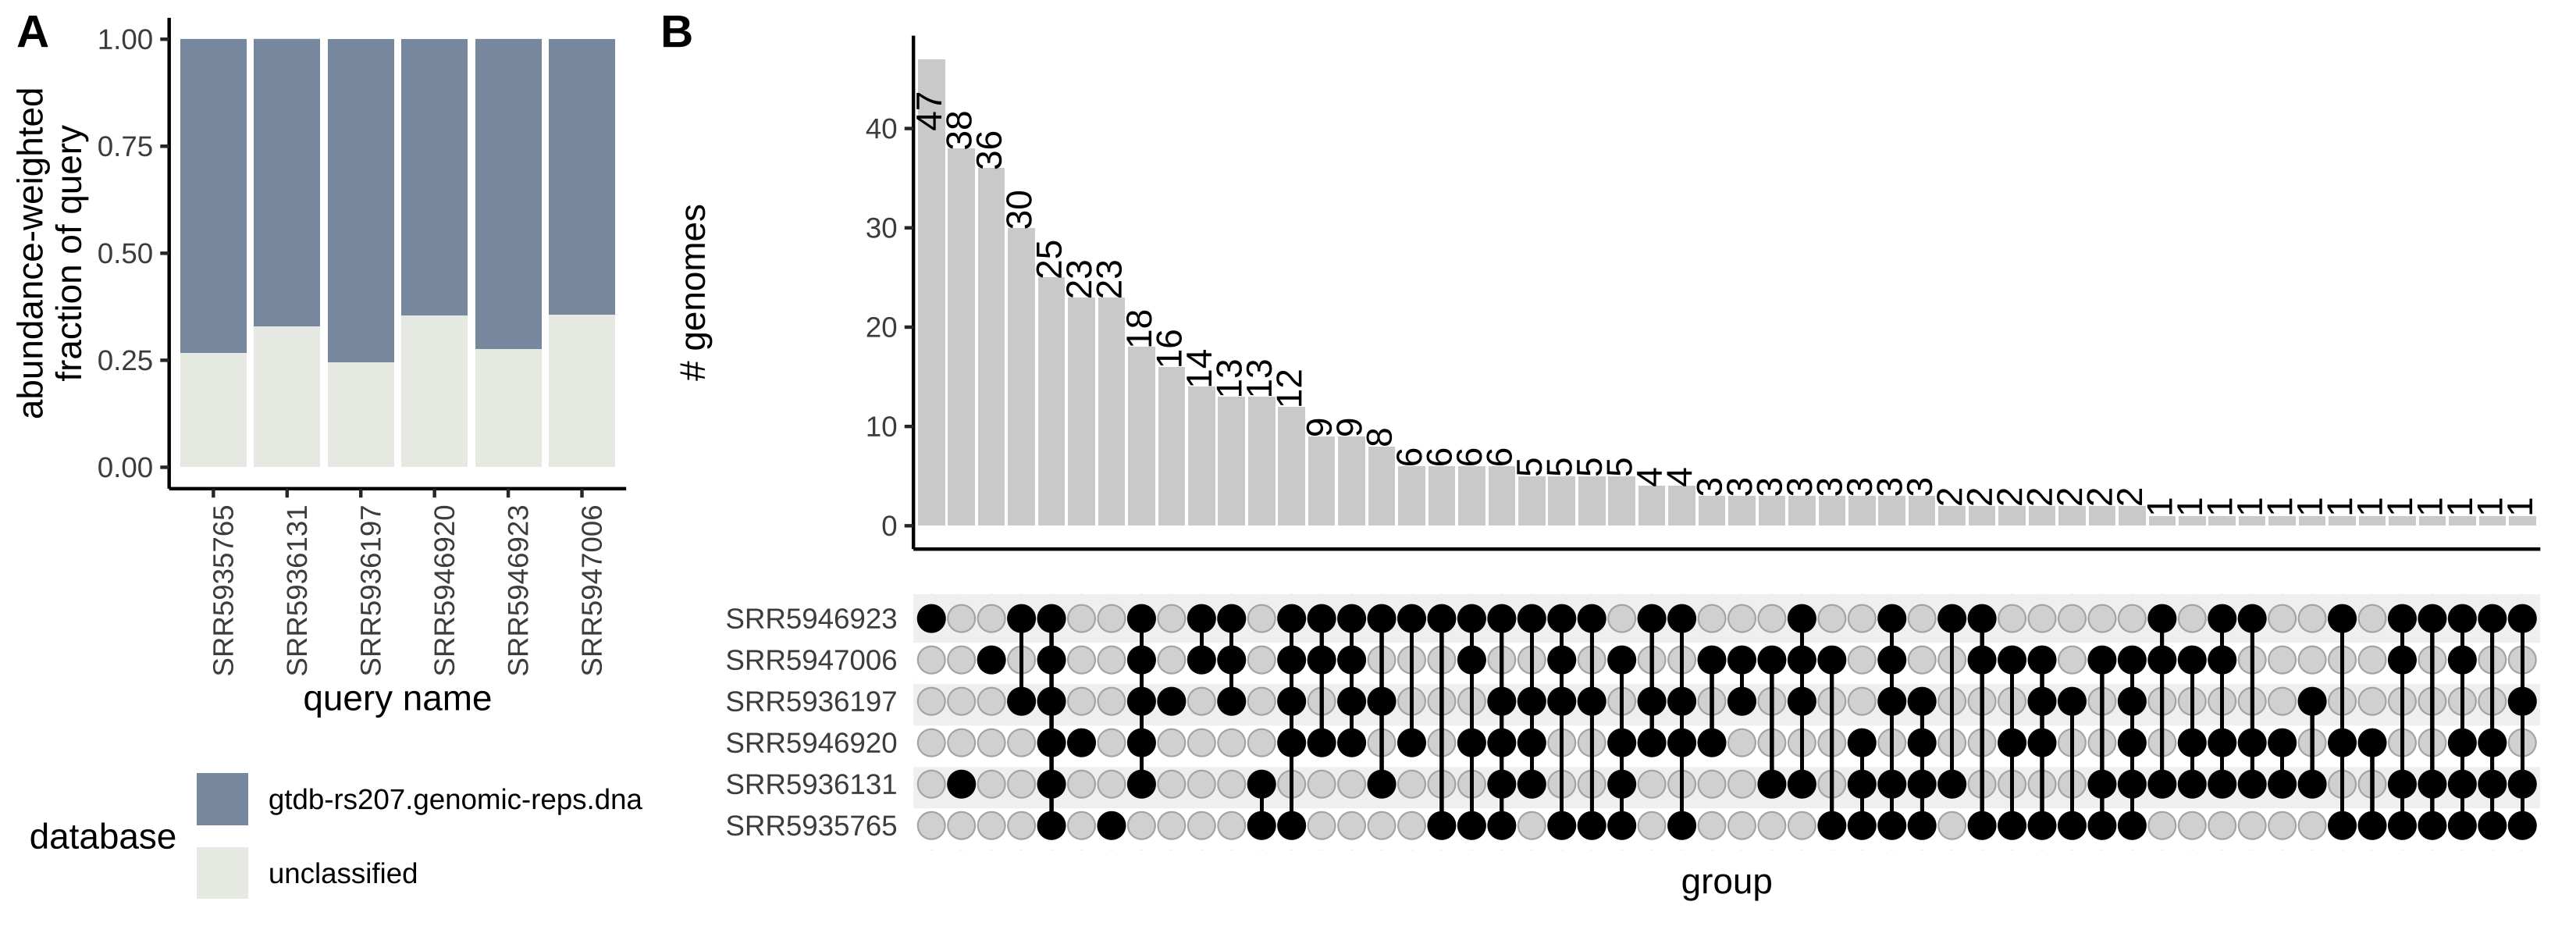

In [22]:
options(repr.plot.width = 11, repr.plot.height = 4, repr.plot.res = 300)

ggarrange(gather_unclassified_plt, gather_upset_plt, labels = c("A", "B"), widths = c(1, 3))

## Taxonomy: sankey

In [23]:
tax_sankey <- plot_taxonomy_annotate_sankey(taxonomy_annotate_df = gut_taxonomy_annotate_df %>%
                                dplyr::filter(query_name == "SRR5935765"), 
                              tax_glom_level = "order",
                              palette = grDevices::colorRampPalette(c("#C6E7F4", "#F5E4BE", "#F5CBE4", "#FFB984"))(n = 10))

## Taxonomy: ts alluvial

In [24]:
taxonomy_annotate_df <- read_taxonomy_annotate(Sys.glob("outputs/sourmash_taxonomy/day*csv"), intersect_bp_threshold = 50000)

In [25]:
time_df <- data.frame(query_name = unique(taxonomy_annotate_df$query_name),
                      time = c(15, 15.5, 16, 17, 17.5, 18, 19, 22, 22.5, 23, 24))

In [26]:
tax_alluvial <- plot_taxonomy_annotate_ts_alluvial(taxonomy_annotate_df = taxonomy_annotate_df,
                                                   time_df = time_df, 
                                                   tax_glom_level = "genus",
                                                   fraction_threshold = 0.01) +
  scale_x_continuous(breaks = c(15, 15.5, 16, 17, 17.5, 18, 19, 22, 22.5, 23, 24)) +
  ggplot2::scale_fill_manual(values = c("#C6E7F4", "#FACAB5", "#B5BEA4", 
                                        "#F5E4BE", "#DCBFFC", "#F5CBE4")) +
  guides(fill=guide_legend(override.aes = list(color = NA, alpha = NA)))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


## Taxonomy: upset

In [29]:
data(gut_taxonomy_annotate_df)
gut_taxonomy_upset_inputs <- from_taxonomy_annotate_to_upset_inputs(taxonomy_annotate_df = gut_taxonomy_annotate_df, 
                                                                    tax_glom_level = "order")

In [32]:
palette = grDevices::colorRampPalette(colors = c("#FACAB5", "#B5BEA4", "#C6E7F4",
                                                 "#F5E4BE", "#DCBFFC", "#8A99AD", "#F5CBE4"))(n=8)
tax_upset <- plot_taxonomy_annotate_upset(upset_inputs = gut_taxonomy_upset_inputs, 
                                          fill = "phylum", 
                                          palette = palette)

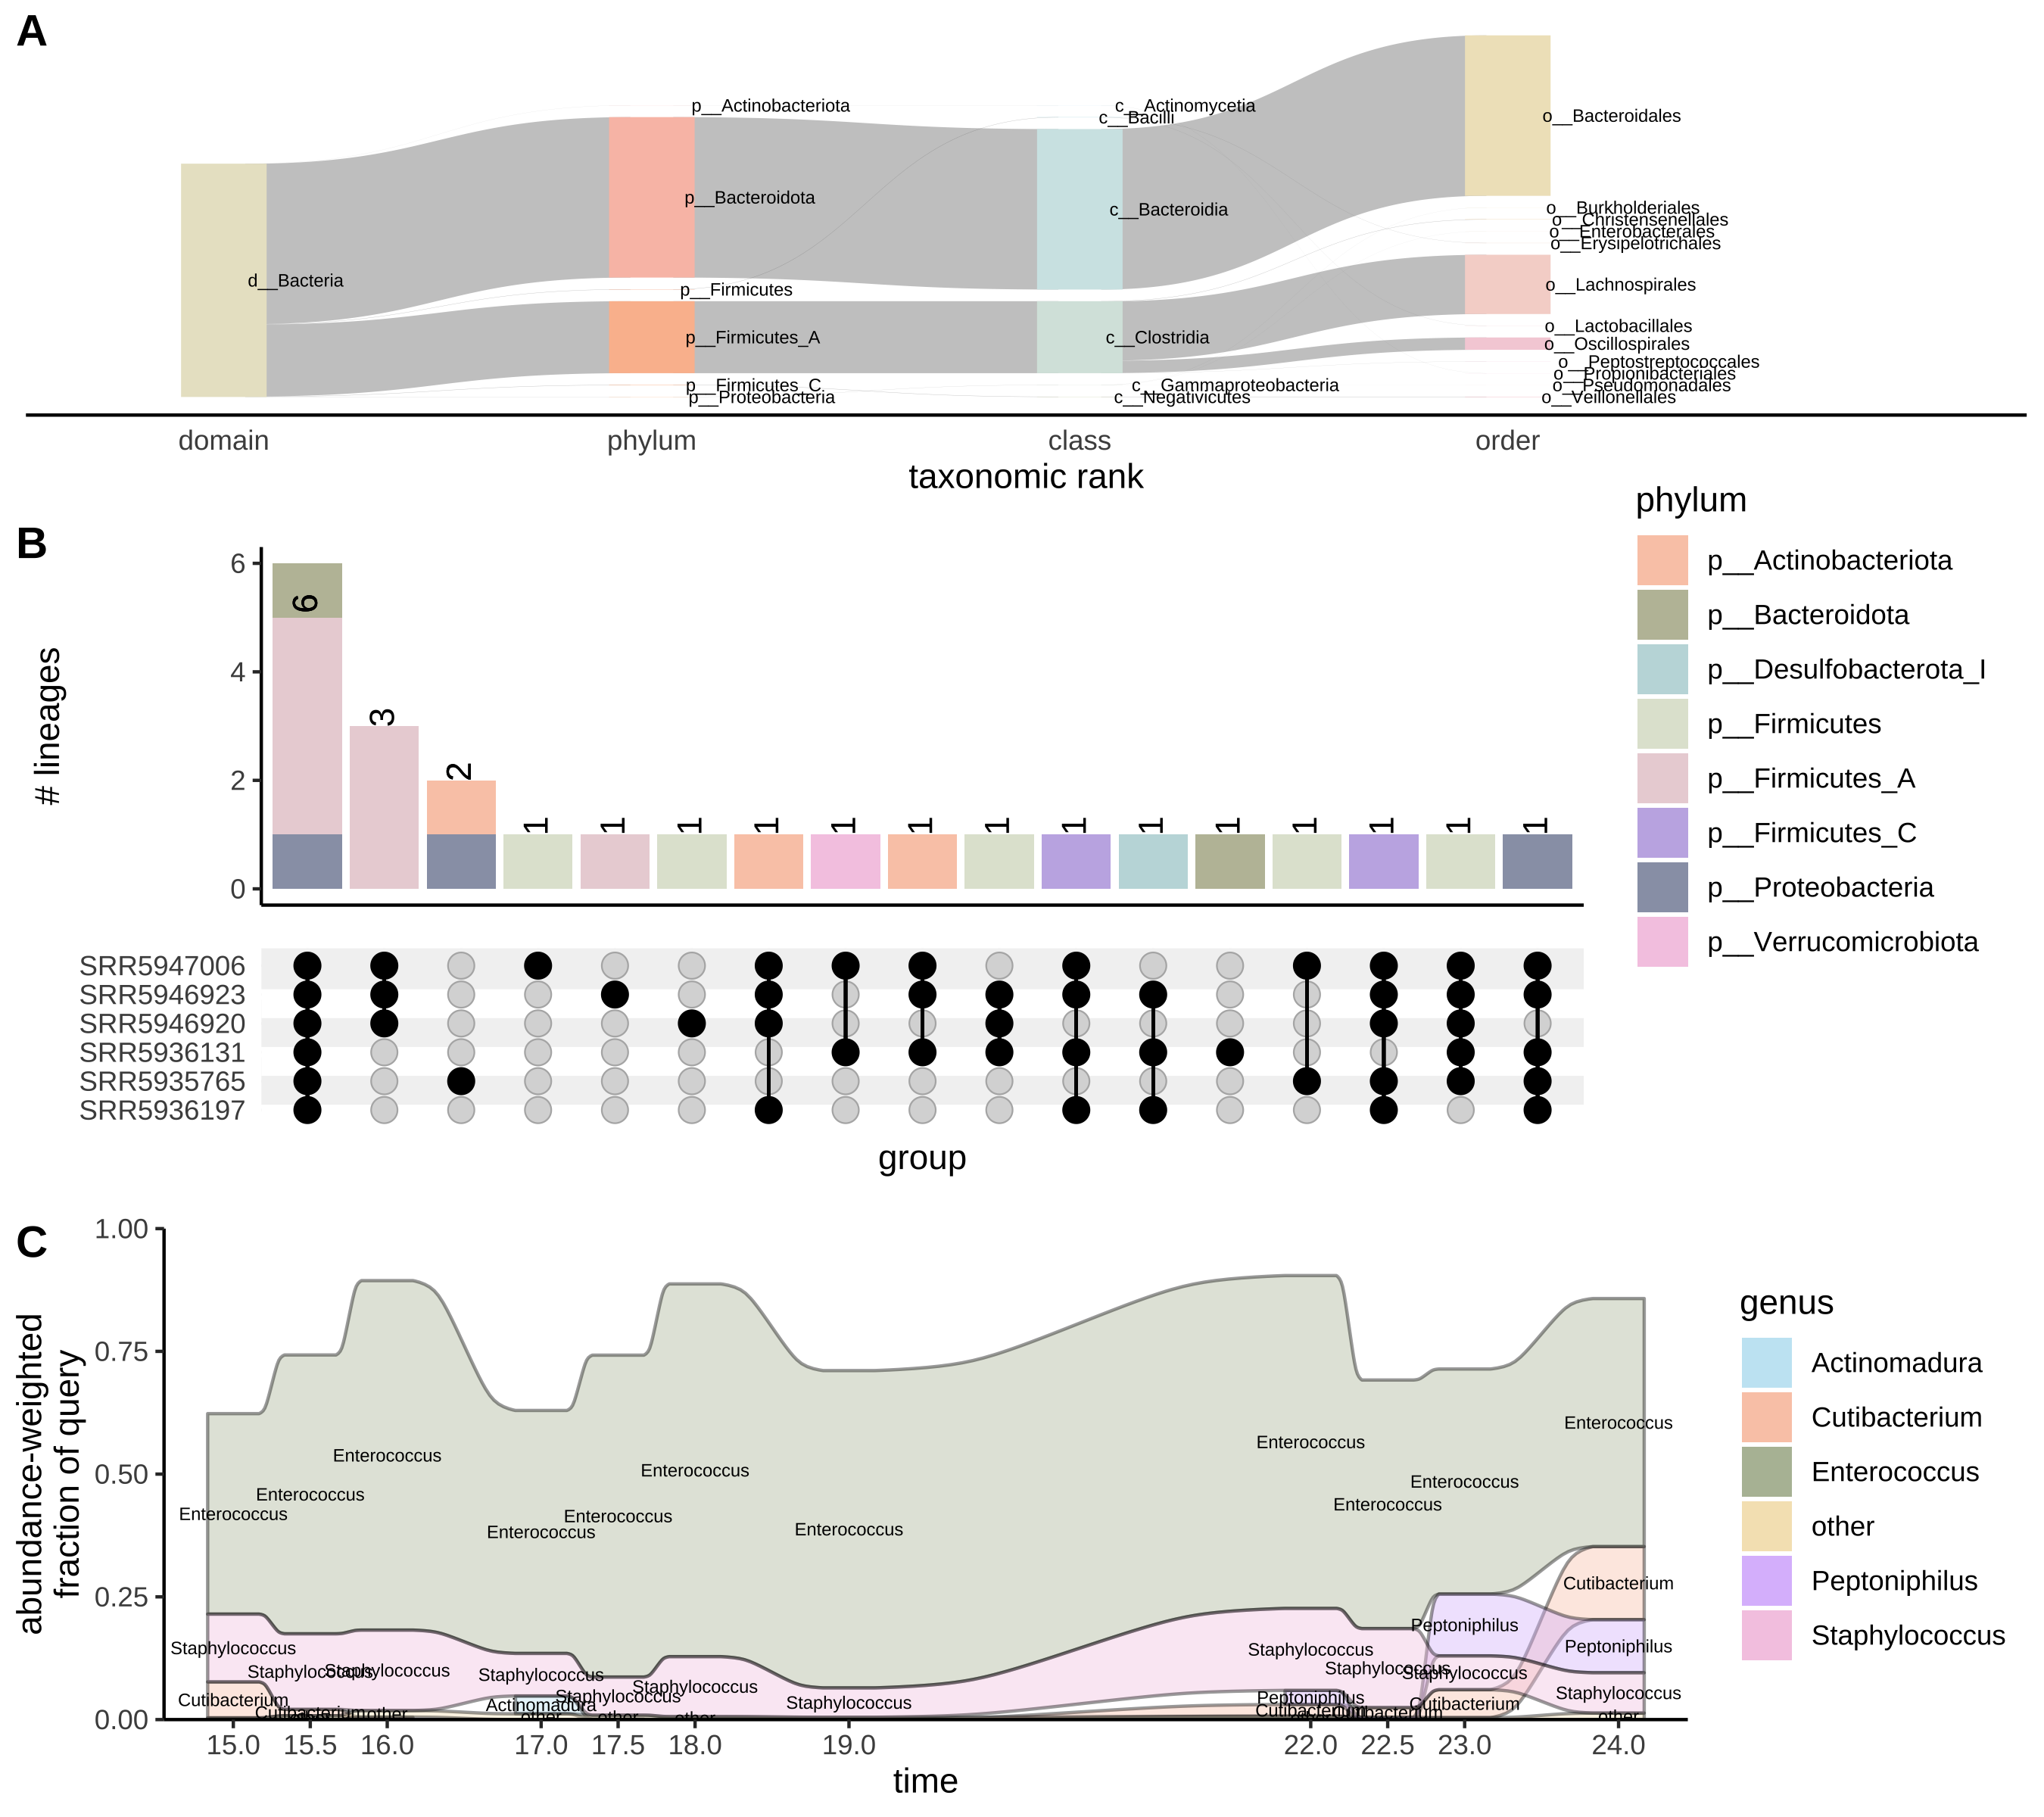

In [35]:
options(repr.plot.width = 9, repr.plot.height = 8, repr.plot.res = 300)

ggarrange(tax_sankey, tax_upset, tax_alluvial, 
          labels = c("A", "B", "C"),
          ncol = 1, nrow = 3, heights = c(1.1, 1.5, 1.3))

## Convert to: phyloseq (skipped)

## Convert to: metacoder

In [35]:
gut_metacoder <- from_taxonomy_annotate_to_metacoder(taxonomy_annotate_df = gut_taxonomy_annotate_df, 
                                                     intersect_bp_threshold = 50000, 
                                                     tax_glom_level = "order",
                                                     groups = metadata)


Summing per-taxon counts from 6 columns for 43 taxa

Calculating number of samples with a value greater than 0 for 6 columns in 2 groups for 43 observations



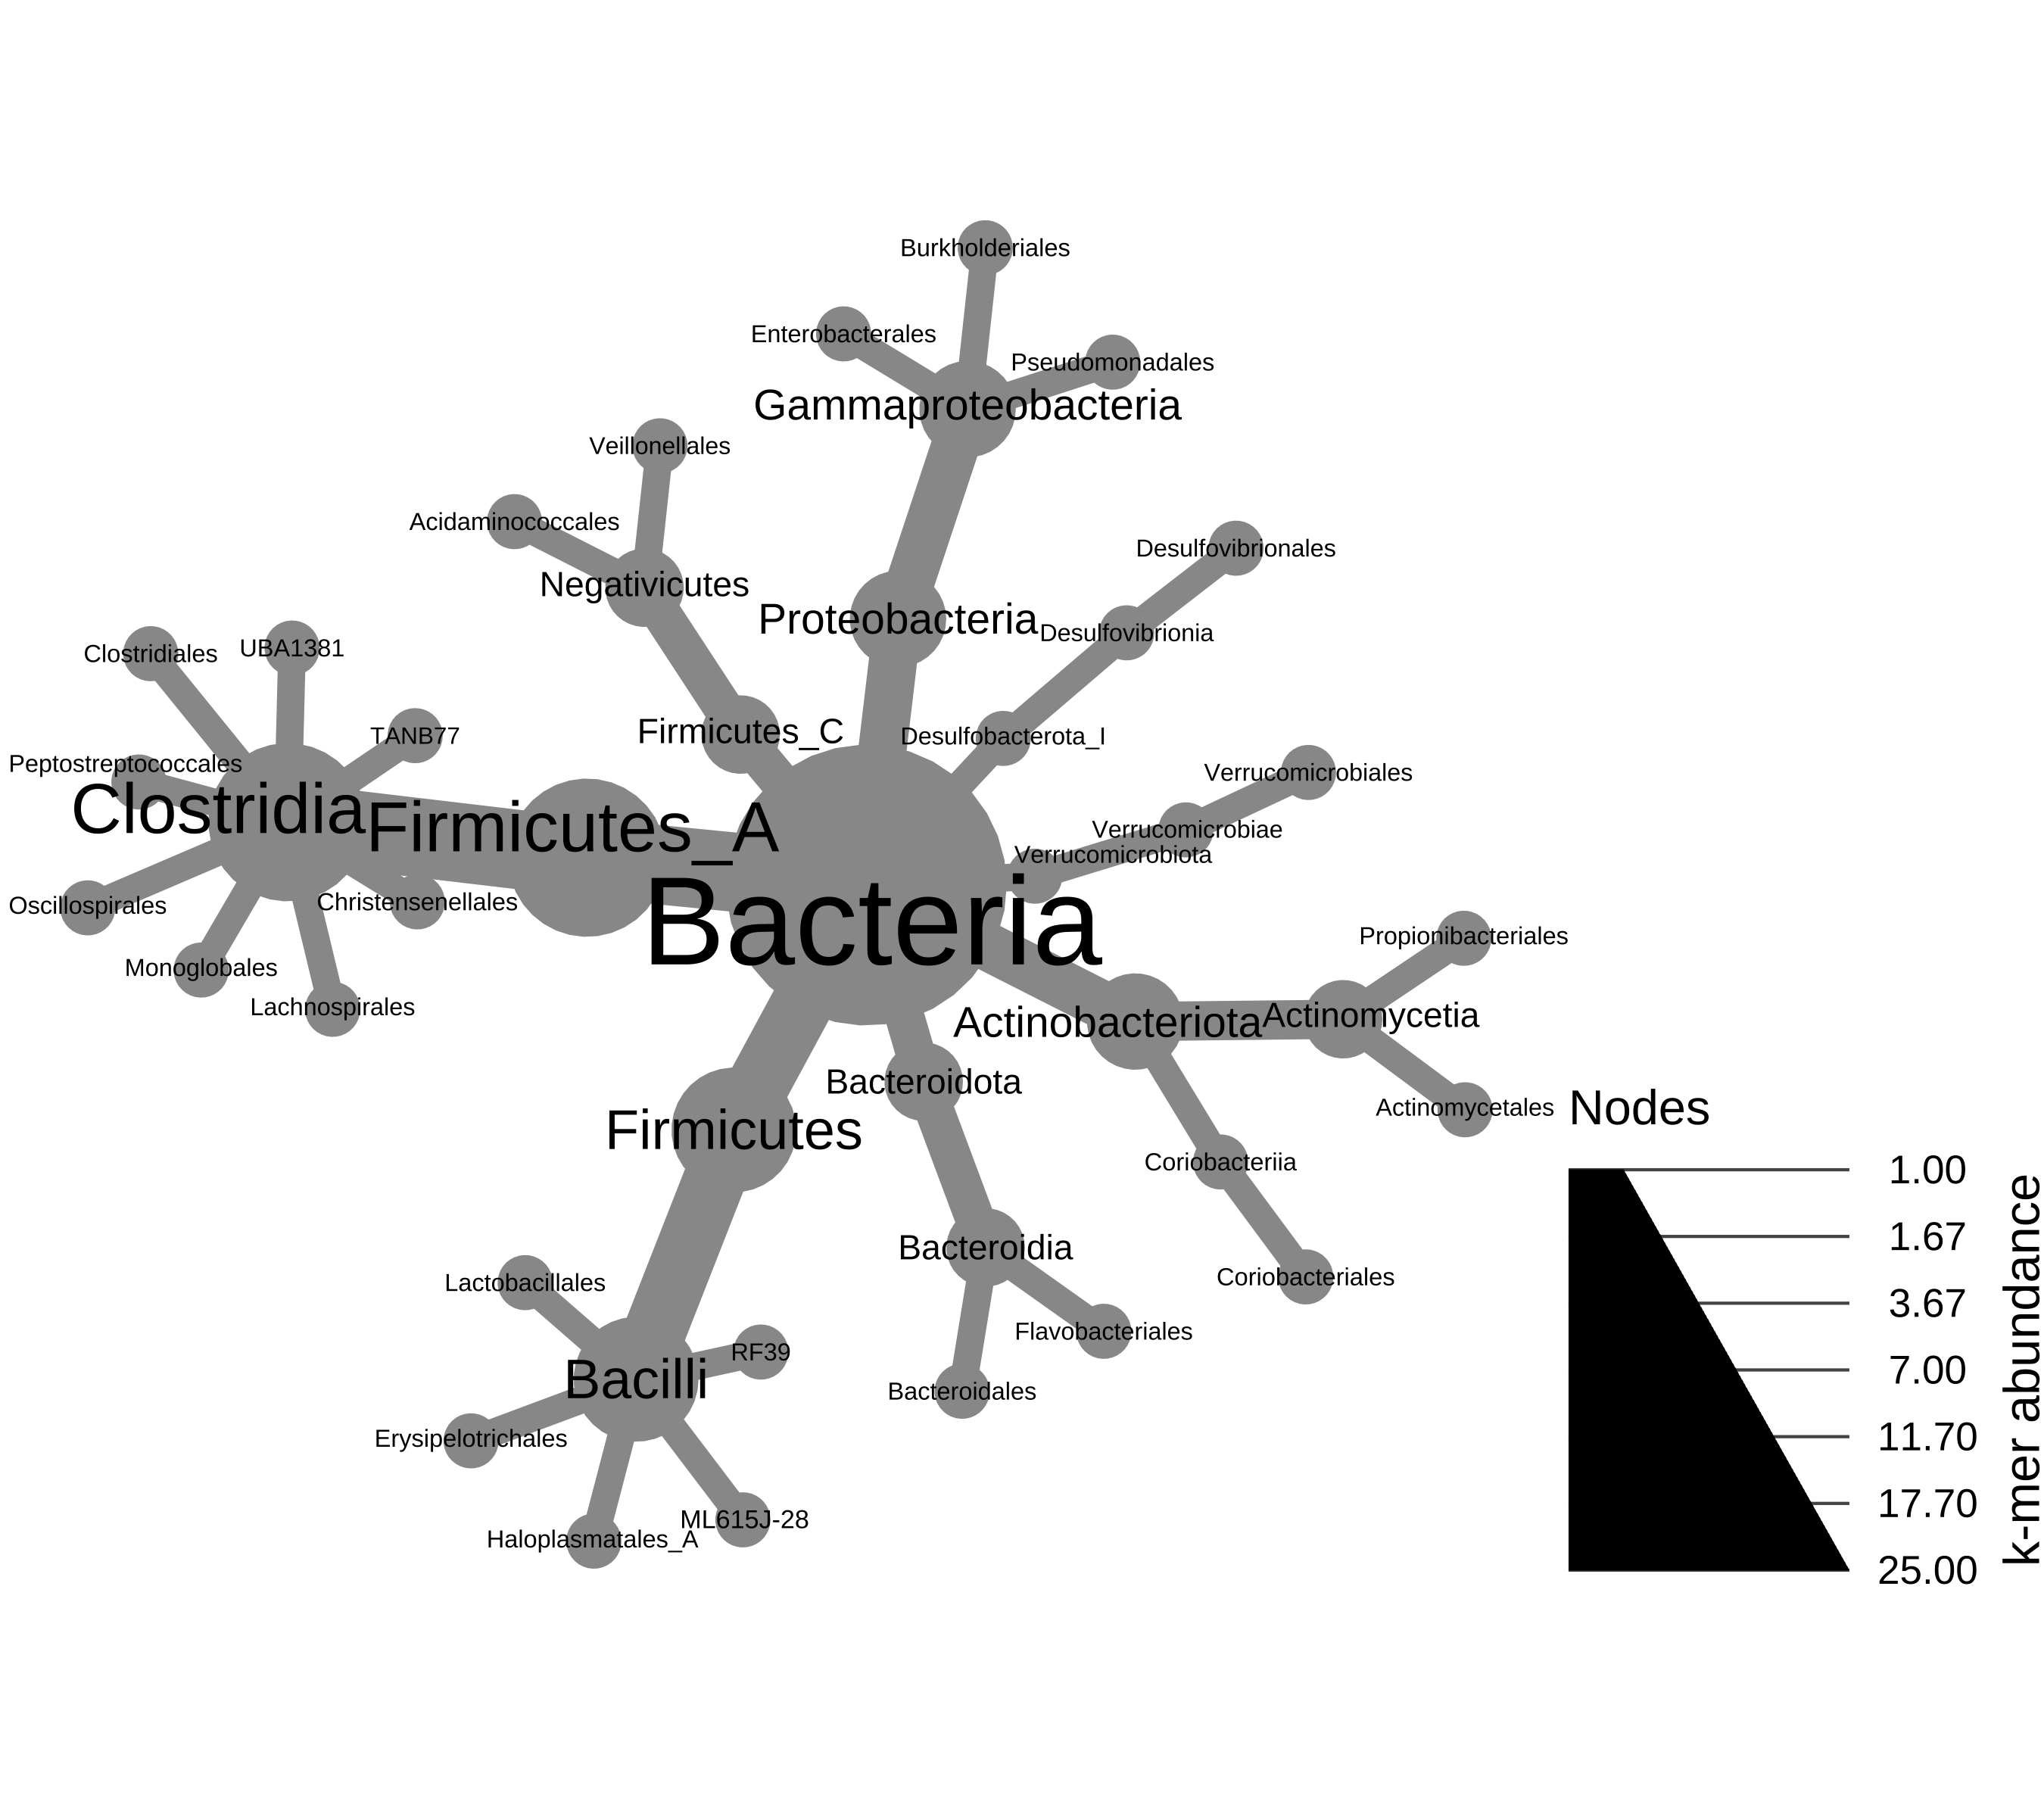

In [36]:
# generate a heat_tree plot with taxa from all samples, agglomerated to the order level
set.seed(1) # This makes the plot appear the same each time it is run 
metacoder::heat_tree(gut_metacoder, 
                     node_label = taxon_names,
                     node_size = n_obs,
                     node_size_axis_label = "k-mer abundance",
                     layout = "davidson-harel", # The primary layout algorithm
                     initial_layout = "reingold-tilford") # Node location algorithm 